In [1]:
from sklearn.datasets import load_digits
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt


In [2]:
digits_ds = load_digits()

In [3]:
X = digits_ds["data"]

In [4]:
Y = digits_ds["target"]

In [5]:
X = X.reshape((-1,8,8,1))

In [6]:
Index = tf.random.shuffle(tf.range(0,X.shape[0]))
X = X[Index]
Y = Y[Index]

In [7]:
XTrain = X[:1097]
YTrain = Y[:1097]
XTest = X[1097:]
YTest = Y[1097:]

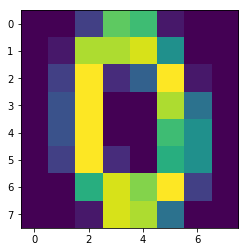

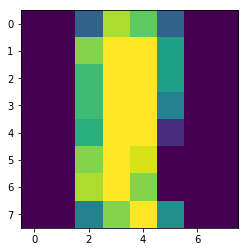

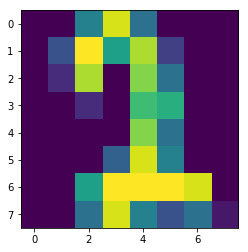

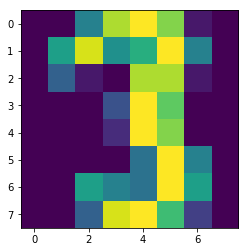

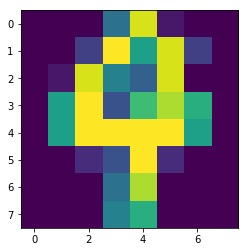

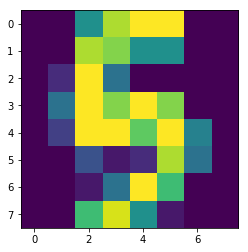

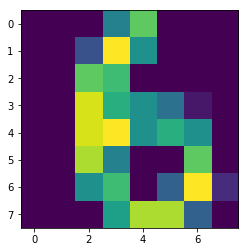

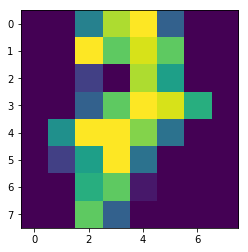

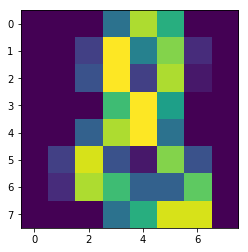

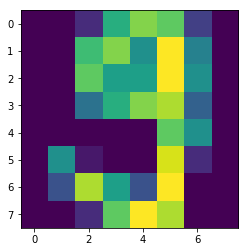

In [8]:
for i in range(10):
    plt.imshow(X[Y == i][1].reshape(8,8))
    plt.show()

In [9]:
def construct_model():
    from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense
    from tensorflow.keras.activations import relu, linear
    from tensorflow.keras.models import Model
    
    inputs = keras.layers.Input(shape=(8,8,1))
    
    X = inputs
    X = Conv2D(activation=relu, strides=(1,1),kernel_size=(2,2),filters=4)(X)
    
    
    X = Conv2D(activation=relu, strides=(1,1),kernel_size=(2,2),filters=2)(X)
    X = Conv2D(activation=relu, strides=(1,1),kernel_size=(2,2),filters=2)(X)
    
    
    # BottleNeck
    X = Dense(units=2, activation=relu)(X)
    X = Dense(units=2, activation=relu)(X)
    
    
    
    X = Conv2DTranspose(activation=relu, strides=(1,1),kernel_size=(2,2),filters=2)(X)
    X = Conv2DTranspose(activation=relu, strides=(1,1),kernel_size=(2,2),filters=2)(X)
    
    X = Conv2DTranspose(activation=relu, strides=(1,1),kernel_size=(2,2),filters=4)(X)
    X = Conv2D(activation=relu, strides=(1,1), kernel_size=(1,1), filters=1)(X)
    
    
    
    model = Model(inputs=inputs, outputs=X)
    
    return model
    
model = construct_model()

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 4)           20        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 2)           34        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 2)           18        
_________________________________________________________________
dense (Dense)                (None, 5, 5, 2)           6         
_________________________________________________________________
dense_1 (Dense)              (None, 5, 5, 2)           6         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 2)           18    

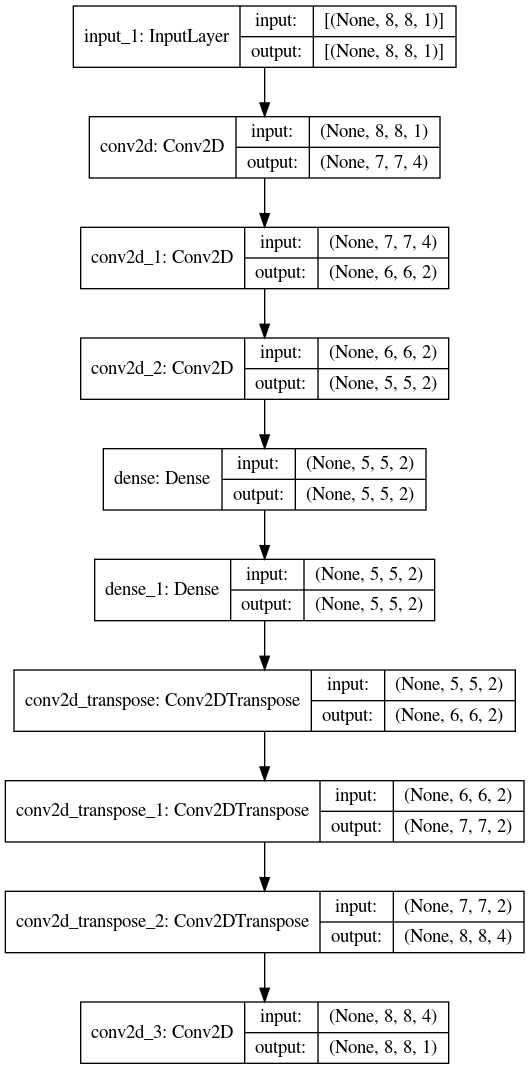

In [11]:
plot_model(model,show_shapes=True)

In [13]:
model.compile(keras.optimizers.Adam(),loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_absolute_percentage_error])

In [14]:
histories = []

In [15]:
histories.append(model.fit(x=XTrain,y=XTrain, epochs=250,validation_data=(XTest,XTest) ))

Train on 1097 samples, validate on 700 samples
Epoch 1/250
1097/1097 [==============================] - 1s 673us/sample - loss: 58.6119 - mean_absolute_percentage_error: 36676840.0000 - val_loss: 55.5698 - val_mean_absolute_percentage_error: 88004008.0000
Epoch 2/250
1097/1097 [==============================] - 0s 252us/sample - loss: 47.5429 - mean_absolute_percentage_error: 207765984.0000 - val_loss: 31.4487 - val_mean_absolute_percentage_error: 481029376.0000
Epoch 3/250
1097/1097 [==============================] - 0s 239us/sample - loss: 26.1960 - mean_absolute_percentage_error: 748034176.0000 - val_loss: 25.2326 - val_mean_absolute_percentage_error: 731251328.0000
Epoch 4/250
1097/1097 [==============================] - 0s 244us/sample - loss: 24.5172 - mean_absolute_percentage_error: 763477248.0000 - val_loss: 24.3718 - val_mean_absolute_percentage_error: 778537984.0000
Epoch 5/250
1097/1097 [==============================] - 0s 243us/sample - loss: 23.8112 - mean_absolute_percen

1097/1097 [==============================] - 0s 236us/sample - loss: 9.8315 - mean_absolute_percentage_error: 580831040.0000 - val_loss: 9.8493 - val_mean_absolute_percentage_error: 584730432.0000
Epoch 40/250
1097/1097 [==============================] - 0s 239us/sample - loss: 9.7579 - mean_absolute_percentage_error: 577965184.0000 - val_loss: 9.7636 - val_mean_absolute_percentage_error: 565094464.0000
Epoch 41/250
1097/1097 [==============================] - 0s 237us/sample - loss: 9.6765 - mean_absolute_percentage_error: 567139840.0000 - val_loss: 9.6914 - val_mean_absolute_percentage_error: 568189056.0000
Epoch 42/250
1097/1097 [==============================] - 0s 243us/sample - loss: 9.5985 - mean_absolute_percentage_error: 564086400.0000 - val_loss: 9.6295 - val_mean_absolute_percentage_error: 556667520.0000
Epoch 43/250
1097/1097 [==============================] - 0s 252us/sample - loss: 9.5310 - mean_absolute_percentage_error: 556652032.0000 - val_loss: 9.5566 - val_mean_absol

1097/1097 [==============================] - 0s 238us/sample - loss: 8.3352 - mean_absolute_percentage_error: 497128480.0000 - val_loss: 8.3861 - val_mean_absolute_percentage_error: 503159328.0000
Epoch 79/250
1097/1097 [==============================] - 0s 253us/sample - loss: 8.3144 - mean_absolute_percentage_error: 497997888.0000 - val_loss: 8.3635 - val_mean_absolute_percentage_error: 497574976.0000
Epoch 80/250
1097/1097 [==============================] - 0s 246us/sample - loss: 8.3057 - mean_absolute_percentage_error: 499165216.0000 - val_loss: 8.3636 - val_mean_absolute_percentage_error: 487103872.0000
Epoch 81/250
1097/1097 [==============================] - 0s 248us/sample - loss: 8.3006 - mean_absolute_percentage_error: 490160800.0000 - val_loss: 8.3372 - val_mean_absolute_percentage_error: 504397120.0000
Epoch 82/250
1097/1097 [==============================] - 0s 242us/sample - loss: 8.2392 - mean_absolute_percentage_error: 493745248.0000 - val_loss: 8.3112 - val_mean_absol

Epoch 117/250
1097/1097 [==============================] - 0s 242us/sample - loss: 7.6593 - mean_absolute_percentage_error: 432716352.0000 - val_loss: 7.7232 - val_mean_absolute_percentage_error: 433208096.0000
Epoch 118/250
1097/1097 [==============================] - 0s 244us/sample - loss: 7.6396 - mean_absolute_percentage_error: 434070048.0000 - val_loss: 7.7158 - val_mean_absolute_percentage_error: 437663072.0000
Epoch 119/250
1097/1097 [==============================] - 0s 247us/sample - loss: 7.6309 - mean_absolute_percentage_error: 431854112.0000 - val_loss: 7.7007 - val_mean_absolute_percentage_error: 433021120.0000
Epoch 120/250
1097/1097 [==============================] - 0s 239us/sample - loss: 7.6165 - mean_absolute_percentage_error: 427099776.0000 - val_loss: 7.6718 - val_mean_absolute_percentage_error: 434244672.0000
Epoch 121/250
1097/1097 [==============================] - 0s 222us/sample - loss: 7.6113 - mean_absolute_percentage_error: 432836160.0000 - val_loss: 7.677

Epoch 156/250
1097/1097 [==============================] - 0s 244us/sample - loss: 6.8415 - mean_absolute_percentage_error: 377248768.0000 - val_loss: 6.7759 - val_mean_absolute_percentage_error: 358009696.0000
Epoch 157/250
1097/1097 [==============================] - 0s 248us/sample - loss: 6.7891 - mean_absolute_percentage_error: 366137440.0000 - val_loss: 6.7281 - val_mean_absolute_percentage_error: 355480832.0000
Epoch 158/250
1097/1097 [==============================] - 0s 246us/sample - loss: 6.7405 - mean_absolute_percentage_error: 366291680.0000 - val_loss: 6.6983 - val_mean_absolute_percentage_error: 349800320.0000
Epoch 159/250
1097/1097 [==============================] - 0s 246us/sample - loss: 6.7003 - mean_absolute_percentage_error: 361133568.0000 - val_loss: 6.6228 - val_mean_absolute_percentage_error: 366882432.0000
Epoch 160/250
1097/1097 [==============================] - 0s 235us/sample - loss: 6.6517 - mean_absolute_percentage_error: 366588608.0000 - val_loss: 6.586

Epoch 195/250
1097/1097 [==============================] - 0s 237us/sample - loss: 6.0203 - mean_absolute_percentage_error: 311804928.0000 - val_loss: 5.9982 - val_mean_absolute_percentage_error: 295076064.0000
Epoch 196/250
1097/1097 [==============================] - 0s 248us/sample - loss: 5.9816 - mean_absolute_percentage_error: 306761824.0000 - val_loss: 5.9560 - val_mean_absolute_percentage_error: 301515328.0000
Epoch 197/250
1097/1097 [==============================] - 0s 245us/sample - loss: 5.9564 - mean_absolute_percentage_error: 308823360.0000 - val_loss: 5.9348 - val_mean_absolute_percentage_error: 298861536.0000
Epoch 198/250
1097/1097 [==============================] - 0s 249us/sample - loss: 5.9324 - mean_absolute_percentage_error: 307978752.0000 - val_loss: 5.9300 - val_mean_absolute_percentage_error: 295001984.0000
Epoch 199/250
1097/1097 [==============================] - 0s 234us/sample - loss: 5.9238 - mean_absolute_percentage_error: 305417536.0000 - val_loss: 5.911

Epoch 234/250
1097/1097 [==============================] - 0s 254us/sample - loss: 5.6143 - mean_absolute_percentage_error: 282914048.0000 - val_loss: 5.6030 - val_mean_absolute_percentage_error: 280896864.0000
Epoch 235/250
1097/1097 [==============================] - 0s 241us/sample - loss: 5.6028 - mean_absolute_percentage_error: 280912512.0000 - val_loss: 5.6043 - val_mean_absolute_percentage_error: 275148512.0000
Epoch 236/250
1097/1097 [==============================] - 0s 255us/sample - loss: 5.6012 - mean_absolute_percentage_error: 277677152.0000 - val_loss: 5.5877 - val_mean_absolute_percentage_error: 283399264.0000
Epoch 237/250
1097/1097 [==============================] - 0s 246us/sample - loss: 5.5961 - mean_absolute_percentage_error: 280803392.0000 - val_loss: 5.5794 - val_mean_absolute_percentage_error: 279742624.0000
Epoch 238/250
1097/1097 [==============================] - 0s 245us/sample - loss: 5.5817 - mean_absolute_percentage_error: 281127808.0000 - val_loss: 5.574

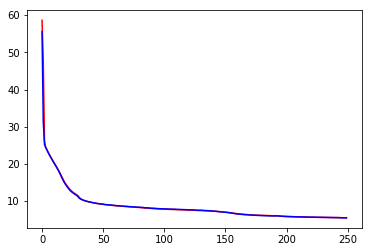

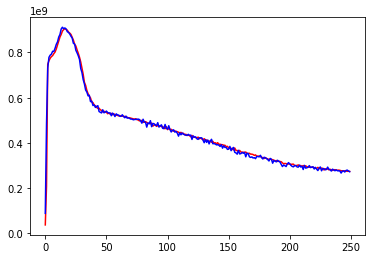

In [16]:
losses = [h.history["loss"] for h in histories]
plt.plot(losses[0],c="r")
losses = [h.history["val_loss"] for h in histories]
plt.plot(losses[0],c="b")
plt.show()

losses = [h.history["mean_absolute_percentage_error"] for h in histories]
plt.plot(losses[0],c="r")
losses = [h.history["val_mean_absolute_percentage_error"] for h in histories]
plt.plot(losses[0],c="b")
plt.show()

In [17]:
predns = model.predict(X)

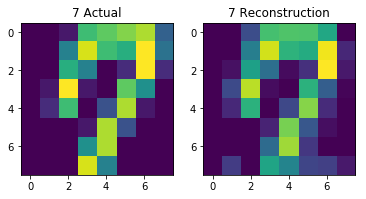

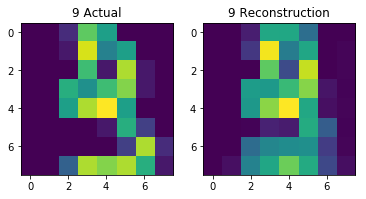

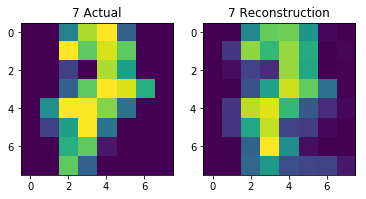

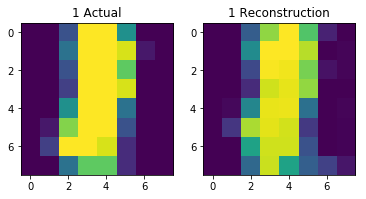

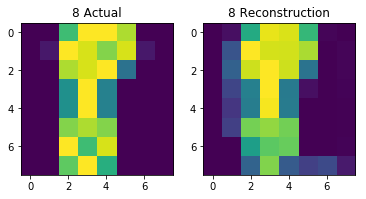

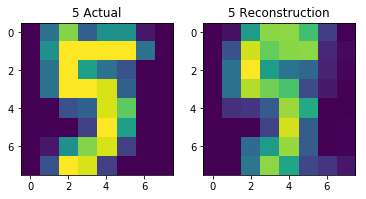

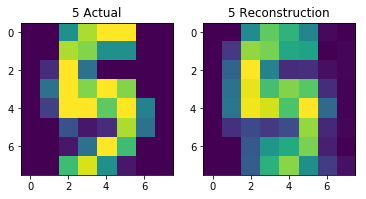

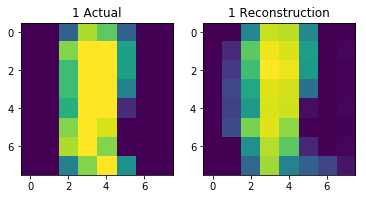

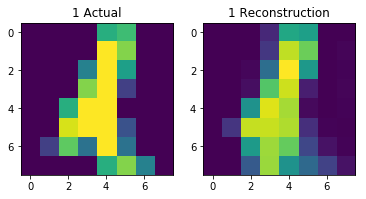

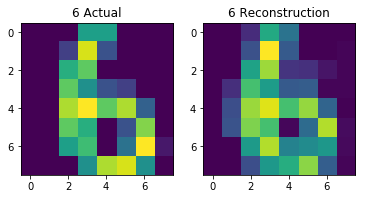

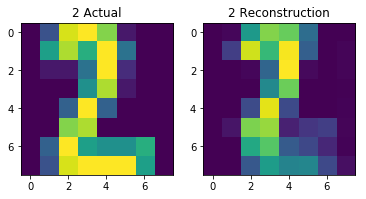

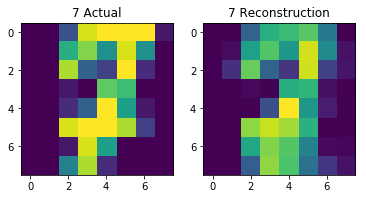

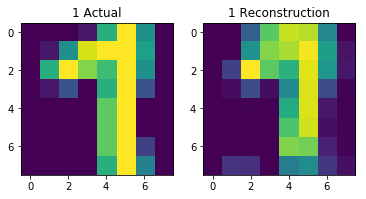

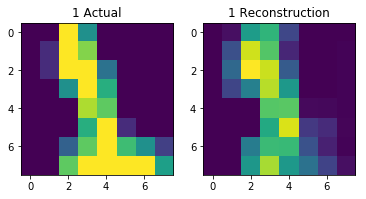

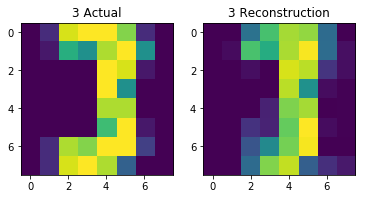

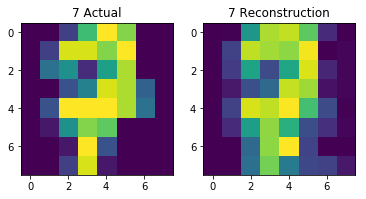

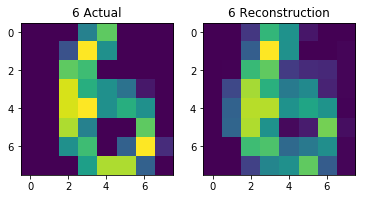

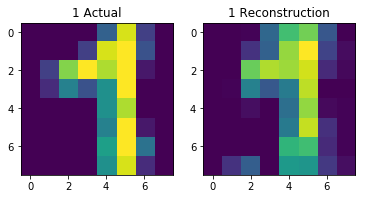

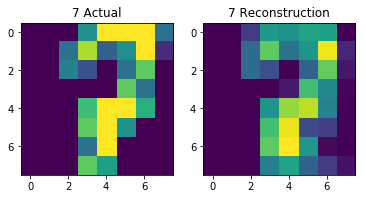

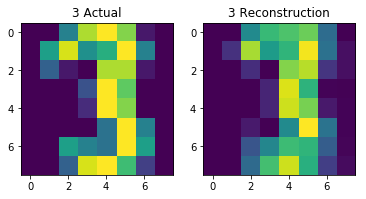

In [28]:
grid = plt.GridSpec(ncols=2, nrows=1)

for i in range(20):
    axes = plt.subplot(grid[0,0])
    plt.title("%d Actual" % Y[i])
    axes.imshow(X[i].reshape((8,8)))
    axes = plt.subplot(grid[0,1])
    plt.title("%d Reconstruction" % Y[i])
    axes.imshow(predns[i].reshape((8,8)))
    plt.show()
    